Phase 1: Data Cleaning and Preprocessing of Urdu Sarcastic Comments Dataset

In [3]:
import pandas as pd  # Importing pandas for data manipulation
import re  # Importing re for regular expressions
import string  # Importing string for handling punctuation

def no_sentiment(reviews, sarcasm):
    """
    This function removes comments with fewer than three words.
    
    Parameters:
    reviews (list): List of review comments.
    sarcasm (list): List of sarcasm flags corresponding to reviews.
    
    Returns:
    tuple: Filtered lists of reviews and sarcasm flags.
    """
    i = 0
    # Iterate through the list of reviews
    while i < len(reviews):
        filtered_words = reviews[i].split()  # Split the comment into words
        # Check if the number of words is less than 3
        if len(filtered_words) < 3:
            reviews.pop(i)  # Remove the review
            sarcasm.pop(i)  # Remove the corresponding sarcasm flag
        else:
            i += 1  # Move to the next comment
    return reviews, sarcasm  # Return filtered reviews and sarcasm flags

def remove_emoji(text):
    """
    This function removes emojis from a given text.
    
    Parameters:
    text (str): The input text from which emojis will be removed.
    
    Returns:
    str: The text with emojis removed.
    """
    # Compile a regex pattern to match emojis
    emoji_pattern = re.compile(
        "[" 
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        u"\U00002702-\U000027B0"  # Various symbols
        u"\U000024C2-\U0001F251"  # Enclosed characters
        u"\U0001F900-\U0001F9FF"  # Additional emojis
        u"\U0001F170-\U0001F171"  # A & B button emojis
        u"\U0001F18E"             # Letter "N" button emoji
        u"\U0001F19A"             # "Squared" variants
        "]+",
        flags=re.UNICODE  # Match emojis based on Unicode
    )
    return emoji_pattern.sub(r'', text)  # Remove emojis from the text

def load_stop_words(file_path):
    """
    This function loads stop words from a specified file.
    
    Parameters:
    file_path (str): Path to the stop words file.
    
    Returns:
    set: A set of stop words.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        # Create a set of stop words by reading lines from the file
        stop_words = set(line.strip() for line in file)
    return stop_words  # Return the set of stop words

# Load Urdu and English stop words
stopwords1 = load_stop_words('stopwords-ur.txt')  # Urdu stop words
stopwords2 = load_stop_words('stopwords.txt')  # English stop words

punc = string.punctuation  # Define punctuation characters
file_path = 'urdu_sarcastic_dataset.csv'  # Path to the input dataset
data = pd.read_csv(file_path, header=None, encoding='utf-8')  # Load the dataset

data = data.iloc[:, :2]  # Retain only the first two columns (comments and sarcasm)
data.columns = ['Comments', 'Sarcasm']  # Rename columns for clarity

filtered_sentences = []  # List to hold cleaned comments
is_sarcasm = []  # List to hold corresponding sarcasm flags
combined_stopwords = set(stopwords1).union(set(stopwords2))  # Combine stop words from both lists

# Iterate through each row of the dataset (skipping the header)
for i in range(1, len(data)):
    text = data.iloc[i, 0]  # Extract the comment
    flag = data.iloc[i, 1]  # Extract the sarcasm label

    if isinstance(text, str):  # Check if the text is a string
        text = text.translate(str.maketrans('', '', punc))  # Remove punctuation
        text = remove_emoji(text)  # Remove emojis from the comment
        # Filter out stop words from the comment
        filtered_words = [word for word in text.split() if word not in combined_stopwords]
        filtered_sentence = ' '.join(filtered_words)  # Join filtered words back into a string
        filtered_sentences.append(filtered_sentence)  # Add to the list of cleaned comments
        is_sarcasm.append(flag)  # Add the corresponding sarcasm flag

# Filter out comments with fewer than three words
filtered_data, is_sarcasm = no_sentiment(filtered_sentences, is_sarcasm)

# Create a DataFrame with filtered comments and sarcasm labels
filtered_data = pd.DataFrame({
    'Comments': filtered_sentences,  
    'Sarcasm': is_sarcasm
})

# Save the cleaned data to a new CSV file
filtered_data.to_csv('filtered_output.csv', index=False, header=False, encoding='utf-8')
print("Data has been Cleaned")

Data has been Cleaned


Phase 2: Urdu Text Normalization and Preprocessing

In [4]:
import os  # Importing os for setting environment variables
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  # Disable OneDNN optimizations for TensorFlow (optional, depending on your system configuration)

import pandas as pd  # Importing pandas for data manipulation
from LughaatNLP import LughaatNLP  # Importing the LughaatNLP library for Urdu text processing

# Load the preprocessed CSV file into a pandas DataFrame
file_path = 'filtered_output.csv'  
data = pd.read_csv(file_path, header=None, encoding='utf-8')  # Read the CSV file without headers, specifying UTF-8 encoding

reviews = []  # Initialize an empty list to store processed reviews

# Initialize the LughaatNLP instance for Urdu text processing
urdu_text_processing = LughaatNLP()

# Iterate through each comment in the dataset
for i in range(len(data)):
    normalized_text = urdu_text_processing.normalize(data.iloc[i, 0])  # Normalize the Urdu text
    stemmed_sentence = urdu_text_processing.urdu_stemmer(normalized_text)  # Perform stemming on the normalized text
    lemmatized_sentence = urdu_text_processing.lemmatize_sentence(stemmed_sentence)  # Lemmatize the stemmed text
    filtered_text = urdu_text_processing.remove_stopwords(lemmatized_sentence)  # Remove stopwords from the lemmatized sentence
    remove_english = urdu_text_processing.remove_english(filtered_text)  # Remove any English words from the Urdu text
    pure_urdu = urdu_text_processing.pure_urdu(remove_english)  # Ensure that the text contains only valid Urdu characters
    special_char = urdu_text_processing.remove_special_characters(pure_urdu)  # Remove special characters from the Urdu text
    reviews.append(special_char)  # Append the fully processed sentence to the reviews list

# Define the name of the output file where processed reviews will be saved
file_name = 'reviews.txt'

# Open the file in write mode with UTF-8 encoding to save the list of processed reviews
with open(file_name, 'w', encoding='utf-8') as file:
    # Write each processed review to the file, one review per line
    for i in range(len(reviews)):
        file.write(f"{reviews[i]}\n")

print(f"List saved to {file_name}")  # Print a confirmation message after the file has been saved


c:\Users\HP\Desktop\NLP\Assignment 1\.venv\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


List saved to reviews.txt


Phase 3: Feature Extraction and Word Embedding for Urdu Reviews

In [6]:
import pandas as pd  # Importing pandas for data manipulation
from nltk.tokenize import word_tokenize  # Importing word_tokenize for splitting text into words
from sklearn.feature_extraction.text import TfidfVectorizer  # Importing TfidfVectorizer for TF-IDF calculations
import ast  # Importing ast for safely evaluating string representations of lists
from gensim.models import Word2Vec  # Importing Word2Vec for creating word embeddings

# Load the tokenized reviews from the text file
file_name = 'reviews.txt'
with open(file_name, 'r', encoding='utf-8') as file:
    reviews = [line.strip() for line in file]  # Read each line and strip whitespace

tokenize_reviews = []  # Initialize a list to hold tokenized reviews

# Tokenize each review and append it to the tokenize_reviews list
for sentence in reviews:
    tokenize = word_tokenize(sentence)  # Tokenize the current sentence
    tokenize_reviews.append(tokenize)  # Append the list of tokens to tokenize_reviews

# Save the tokenized reviews to a new text file
file_name = 'tokenize_reviews.txt'
with open(file_name, 'w', encoding='utf-8') as file:
    for tokenized_review in tokenize_reviews:
        file.write(str(tokenized_review) + '\n')  # Write each tokenized review as a string to the file

# Read the tokenized reviews back from the file
with open(file_name, 'r', encoding='utf-8') as file:
    rev = [' '.join(ast.literal_eval(line.strip())) for line in file]  # Convert each line back to a list of words

# Step 1: Create a TF-IDF representation of the reviews
tfidf = TfidfVectorizer()  # Initialize the TF-IDF Vectorizer
result = tfidf.fit_transform(rev)  # Fit and transform the reviews into TF-IDF format
feature_names = tfidf.get_feature_names_out()  # Get the feature names (terms)
tfidf_array = result.toarray()  # Convert the result to a NumPy array
tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)  # Create a DataFrame for easier manipulation

# Step 2: Find the top 10 highest TF-IDF values
top_terms = tfidf_df.max().nlargest(10)  # Identify the top 10 terms with the highest TF-IDF values

# Print the top terms and their corresponding highest TF-IDF scores
print("Top 10 Terms with Highest TF-IDF Values:\n")
for term, score in top_terms.items():
    print(f"Term: {term} | Highest TF-IDF Value: {score}")

# Step 3: Create a Word2Vec model for word embeddings
model = Word2Vec(sentences=tokenize_reviews, vector_size=100, window=5, min_count=1, sg=1, workers=4)

# Find similar words to "اچھا" using the Word2Vec model
similar_words = model.wv.most_similar("اچھا", topn=5)  # Retrieve the top 5 most similar words

# Output the top 5 similar words
print('\nWord Similarity with word "اچھا"\n')
for word, similarity in similar_words:
    print(f"Word: {word}, Similarity: {similarity}")  # Print each similar word and its similarity score


Top 10 Terms with Highest TF-IDF Values:

Term: ءهههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههہ | Highest TF-IDF Value: 1.0
Term: ارہ | Highest TF-IDF Value: 1.0
Term: اسکہ | Highest TF-IDF Value: 1.0
Term: اعلی | Highest TF-IDF Value: 1.0
Term: اللهمصلوســـلموبرکعلنبينـــامحمد | Highest TF-IDF Value: 1.0
Term: انٹرویو | Highest TF-IDF Value: 1.0
Term: انڈیا | Highest TF-IDF Value: 1.0
Term: او | Highest TF-IDF Value: 1.0
Term: اوہی | Highest TF-IDF Value: 1.0
Term: اپکہ | Highest TF-IDF Value: 1.0

Word Similarity with word "اچھا"

Word: پسند, Similarity: 0.8920865058898926
Word: عمر, Similarity: 0.8868502378463745
Word: امی, Similarity: 0.8831641674041748
Word: واسطہ, Similarity: 0.8699566125869751
Word: زرا, Similarity: 0.8692678809165955


Phase 4: N-gram Analysis of Urdu Reviews

In [7]:
import nltk  # Importing the NLTK library for natural language processing
from nltk import FreqDist, bigrams, trigrams  # Importing necessary functions from NLTK

all_tokens = []  # Initialize a list to hold all tokens from the reviews
file_name = 'reviews.txt'  # Specify the name of the file containing reviews

# Load reviews from the text file
with open(file_name, 'r', encoding='utf-8') as file:
    reviews = [line.strip() for line in file]  # Read each line and strip whitespace

# Tokenize each review and collect all tokens
for i in range(len(reviews)):
    tokens = nltk.word_tokenize(reviews[i])  # Tokenize the current review
    all_tokens.extend(tokens)  # Add the tokens to the all_tokens list

# Unigrams: list of individual tokens
unigram_list = all_tokens  # The list of unigrams is simply all tokens

print("Tokens:", tokens)  # Print the tokens from the last review (for reference)

# Generate bigrams (pairs of consecutive tokens)
bigram_list = list(bigrams(all_tokens))  # Create a list of bigrams from the tokens

# Generate trigrams (triplets of consecutive tokens)
trigram_list = list(trigrams(all_tokens))  # Create a list of trigrams from the tokens

# Calculate frequency distributions for unigrams, bigrams, and trigrams
unigram_freq = FreqDist(unigram_list)  # Frequency distribution of unigrams
bigram_freq = FreqDist(bigram_list)  # Frequency distribution of bigrams
trigram_freq = FreqDist(trigram_list)  # Frequency distribution of trigrams

# Find the top 10 most common bigrams and trigrams
top_10_bigrams = bigram_freq.most_common(10)  # Get the top 10 bigrams
top_10_trigrams = trigram_freq.most_common(10)  # Get the top 10 trigrams

# Print the top bigrams and trigrams
print("Top 10 Bigrams:", top_10_bigrams)  # Display the top 10 bigrams
print("Top 10 Trigrams:", top_10_trigrams)  # Display the top 10 trigrams


Tokens: ['جتنا', 'مرضی', 'بلیک', 'میل', 'این', 'ار', 'او', 'نہانا', 'دا', 'گا', 'جتنہ', 'مرضی', 'جلسہ', 'کرلیں', 'قانون', 'توڑا', 'توجیل', 'دا', 'گانا', 'سڑکا', 'نکلنا', 'بلیک', 'میل', 'کرنہ', 'خواب', 'دیکھنہ', 'ناکام', 'ہونگہ', 'احتجاج', 'کرلا', 'انہا', 'نہانا', 'ہوگا', 'مرشد', 'وزیر', 'اعظم', 'عمران', 'خان']
Top 10 Bigrams: [(('عمران', 'خان'), 502), (('نواز', 'شریف'), 449), (('سندھ', 'پولیس'), 304), (('ارمی', 'چیف'), 224), (('کیپٹن', 'صفدر'), 177), (('جزاک', 'اللہ'), 165), (('مریم', 'نواز'), 159), (('ن', 'لیگ'), 155), (('فالو', 'بیک'), 136), (('جینا', 'سندھ'), 133)]
Top 10 Trigrams: [(('صلی', 'اللہ', 'علیہ'), 95), (('پینا', 'ڈی', 'ایم'), 88), (('جزاک', 'اللہ', 'خیر'), 77), (('فالو', 'فالو', 'بیک'), 71), (('علیہ', 'والہ', 'وسلم'), 71), (('اللہ', 'علیہ', 'والہ'), 62), (('استغفر', 'اللهہ', 'واتوب'), 53), (('عطا', 'فرمائہ', 'امین'), 52), (('اللهہ', 'واتوب', 'اليهہ'), 51), (('تھانہ', 'فون', 'کہنا'), 50)]


Phase 5: Model Training and Evaluation for Sarcasm Detection

In [8]:
import pandas as pd  # Importing pandas for data manipulation
from sklearn.feature_extraction.text import TfidfVectorizer  # Importing TfidfVectorizer for text feature extraction
from sklearn.naive_bayes import MultinomialNB  # Importing Multinomial Naive Bayes classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Importing metrics for model evaluation
from sklearn.model_selection import train_test_split  # Importing train_test_split for data splitting

# Load reviews from the text file
with open('reviews.txt', 'r', encoding='utf-8') as file:
    reviews = [line.strip() for line in file]  # Read each line and strip whitespace

# Load sarcasm labels from the CSV file
file_path = 'filtered_output.csv'  
df = pd.read_csv(file_path, header=None, encoding='utf-8')  # Read the CSV file into a DataFrame

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the reviews to create a TF-IDF feature matrix
X = tfidf.fit_transform(reviews)  # X will contain the TF-IDF features for the reviews
y = df.iloc[:, 1]  # y will contain the sarcasm labels from the DataFrame

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
nb_model = MultinomialNB()  # Create an instance of the Multinomial Naive Bayes classifier

# Train the Naive Bayes model using the training data
nb_model.fit(X_train, y_train)  # Fit the model to the training data

# Make predictions on the test data
y_pred = nb_model.predict(X_test)  # Predict labels for the test set

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
precision = precision_score(y_test, y_pred, pos_label=1)  # Calculate precision for positive class
recall = recall_score(y_test, y_pred, pos_label=1)  # Calculate recall for positive class
f1 = f1_score(y_test, y_pred, pos_label=1)  # Calculate F1-score for positive class

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")  # Display accuracy
print(f"Precision: {precision:.2f}")  # Display precision
print(f"Recall: {recall:.2f}")  # Display recall
print(f"F1-Score: {f1:.2f}")  # Display F1-score


Accuracy: 0.77
Precision: 0.73
Recall: 0.91
F1-Score: 0.81


Phase 6: Model Evaluation and Visualization for Sarcasm Detection

Accuracy: 0.77
Precision: 0.73
Recall: 0.91
F1-Score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.62      0.72      1744
           1       0.73      0.91      0.81      1986

    accuracy                           0.77      3730
   macro avg       0.79      0.76      0.76      3730
weighted avg       0.79      0.77      0.77      3730



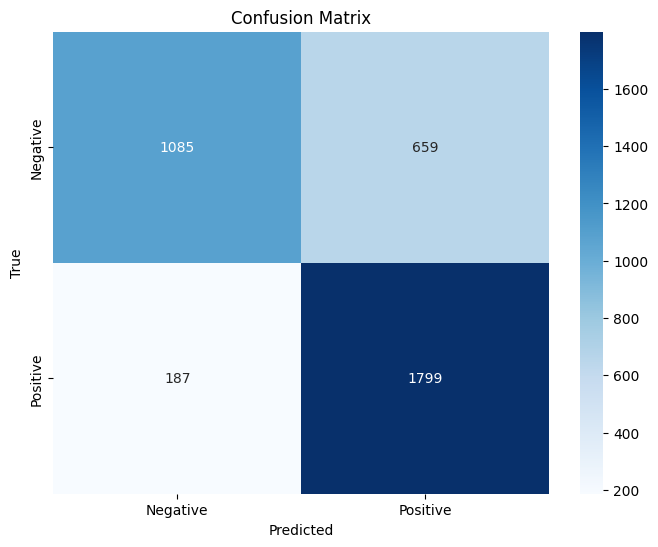

In [9]:
import pandas as pd  # Importing pandas for data manipulation
from sklearn.feature_extraction.text import TfidfVectorizer  # Importing TfidfVectorizer for text feature extraction
from sklearn.naive_bayes import MultinomialNB  # Importing Multinomial Naive Bayes classifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix)  # Importing various metrics for evaluation
from sklearn.model_selection import train_test_split  # Importing train_test_split for data splitting
import seaborn as sns  # Importing seaborn for data visualization
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Load the reviews from a text file
with open('reviews.txt', 'r', encoding='utf-8') as file:
    reviews = [line.strip() for line in file]  # Read each line and strip whitespace

# Load sarcasm labels from a CSV file
file_path = 'filtered_output.csv'  
df = pd.read_csv(file_path, header=None, encoding='utf-8')  # Read the CSV file into a DataFrame

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer()  # Create an instance of the TF-IDF Vectorizer
X = tfidf.fit_transform(reviews)  # Fit and transform the reviews to create a TF-IDF feature matrix
y = df.iloc[:, 1]  # Extract the sarcasm labels from the DataFrame

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()  # Create an instance of the Multinomial Naive Bayes classifier
nb_model.fit(X_train, y_train)  # Fit the model to the training data

# Make predictions on the test data
y_pred = nb_model.predict(X_test)  # Predict labels for the test set

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
precision = precision_score(y_test, y_pred, pos_label=1)  # Calculate precision for the positive class
recall = recall_score(y_test, y_pred, pos_label=1)  # Calculate recall for the positive class
f1 = f1_score(y_test, y_pred, pos_label=1)  # Calculate F1-score for the positive class

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")  # Display accuracy
print(f"Precision: {precision:.2f}")  # Display precision
print(f"Recall: {recall:.2f}")  # Display recall
print(f"F1-Score: {f1:.2f}")  # Display F1-score

# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))  # Print the classification report

# Create and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # Create a heatmap for the confusion matrix
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')  # Label for the x-axis
plt.ylabel('True')  # Label for the y-axis
plt.title('Confusion Matrix')  # Title for the plot
plt.show()  # Display the plot
